In [25]:
import pandas as pd
import warnings
import spacy
from sklearn.datasets import fetch_20newsgroups
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

# Load Dataset

In [6]:
# Dictionary with 'data' as key and each review as an element of list
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

# list of articles
documents = dataset.data

# Dataframe with a column `document` containing all the articles
news_df = pd.DataFrame({'document':documents})

news_df.head()

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [8]:
tokenized_doc_spacy = news_df[:100]

In [9]:
tokenized_doc_spacy[:1]

,document
0,Well i'm not sure about the story nad it did s...


# Load Spacy

In [10]:
nlp = spacy.load('en')

In [14]:
stopwords = list(STOP_WORDS)

# Function to process data

In [15]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuation ]
    mytokens = [ word for word in mytokens if len(word) > 3]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [16]:
# Creating a list of documents from the complaints column
list_of_docs = tokenized_doc_spacy['document'].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [spacy_tokenizer(doc).split() for doc in list_of_docs]

In [17]:
print(doc_clean[:1])

[['sure', 'story', 'biased', 'disagree', 'statement', 'u.s.', 'media', 'ruin', 'israels', 'reputation', 'rediculous', 'u.s.', 'medium', 'israeli', 'medium', 'world', 'live', 'europe', 'realize', 'incidence', 'describe', 'letter', 'occur', 'u.s.', 'medium', 'ignore', 'u.s.', 'subsidize', 'israels', 'existance', 'europeans', 'degree', 'think', 'reason', 'report', 'clearly', 'atrocity', 'shame', 'austria', 'daily', 'report', 'inhuman', 'commit', 'israeli', 'soldier', 'blessing', 'receive', 'government', 'holocaust', 'guilt', 'away', 'look', 'jews', 'treat', 'race', 'power', 'unfortunate']]


# Create Corpus using Bag of words

In [21]:
words = corpora.Dictionary(doc_clean)
corpus = [words.doc2bow(doc) for doc in doc_clean]

# LDA Modeling

In [23]:
lda_model = LdaModel(corpus=corpus, id2word=words, num_topics=5, random_state=2, update_every=1,\
                                 passes=10, alpha='auto')


In [24]:
print(lda_model.print_topics())

[(0, '0.009*"israel" + 0.007*"know" + 0.006*"cache" + 0.006*"good" + 0.006*"israeli" + 0.005*"time" + 0.005*"life" + 0.005*"people" + 0.004*"card" + 0.004*"thing"'), (1, '0.006*"year" + 0.006*"like" + 0.004*"think" + 0.004*"good" + 0.004*"phone" + 0.004*"power" + 0.004*"adirondack" + 0.004*"cable" + 0.004*"cheap" + 0.004*"government"'), (2, '0.007*"like" + 0.006*"know" + 0.006*"contact" + 0.006*"patch" + 0.005*"work" + 0.005*"force" + 0.005*"bike" + 0.004*"hole" + 0.004*"good" + 0.004*"look"'), (3, '0.006*"think" + 0.005*"year" + 0.004*"time" + 0.004*"father" + 0.003*"real" + 0.003*"love" + 0.003*"problem" + 0.003*"memory" + 0.003*"heaven" + 0.003*"heart"'), (4, '0.009*"mail" + 0.009*"send" + 0.009*"image" + 0.009*"graphic" + 0.008*"file" + 0.007*"object" + 0.006*"/pub" + 0.006*"format" + 0.005*"tracer" + 0.005*"system"')]


# Word Could 

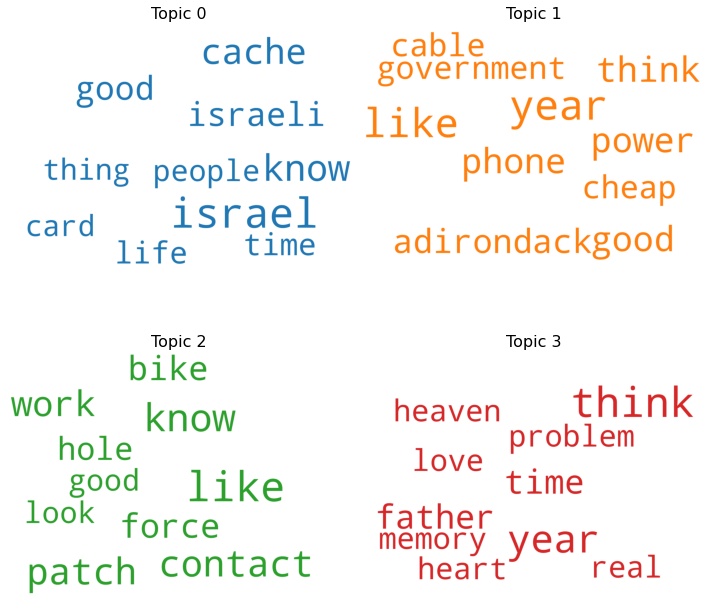

In [26]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()